## Introduction

This notebook is part of a study investigating the motivations behind the human inclination to automate tasks. The study explores whether people are more likely to automate tasks that are time-consuming, unenjoyable, or meaningless. This research aims to understand these preferences across different social groups, defined by gender identity and income. Using data from the BEHAVIOR-1K dataset, the American Time-Use Survey (ATUS), and the American Time-Use Survey Well-Being module (ATUS-WB), we analyze the correlation between the desire for automation and various factors such as time spent on daily activities, happiness, and meaningfulness.



### In this notebook, we demonstrate how to read and filter the ATUS Time data. 


1. **Importing the necessary library**:

2. **Loading the necessary files**:
    - The file path is set to `"/Users/ruchiraray/Documents/UT Austin/Soc-HHR/lexiconwex2021.csv"`. Replace this path with the path to your CSV file.

3. **Creating a dictionary of activities**:
    - A dictionary (`activity_code_dict`) is created from the filtered DataFrame, where the keys are the '6-digit activity code' values, and the corresponding values are the 'Activity' name.

4. **Filtering the DataFrame**:
    - The DataFrame based on age, income, gender


## Data Loading


To start off we first load the dataset, these are the csv file we get from ATUS. We select ATUS Summary as it has time info per activity. We also load lexiconwex2021.csv to map the activity to the 6-digit activity code given by ATUS to get a activity dictionary. This dictionary will be used for further analysis in the project.


Replace 'file_path' with the path to the CSV file you want to read

In [106]:
import pandas as pd

# Replace 'your_file_path.csv' with the path to the CSV file you want to read
# file_path = '/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/lexiconwex2022.csv'
file_path = "data/lexiconwex2021.csv"

# Attempt to read the CSV file

df = pd.read_csv(file_path, header=0)
activity_code_df = df[df['6-digit activity code'].notna()][['6-digit activity code', 'Activity']]

activity_code_dict = pd.Series(activity_code_df['Activity'].values, index=activity_code_df['6-digit activity code']).to_dict()
print(len(activity_code_dict))

466




Now we load the American Time-Use Survey (ATUS) 2021 dataset.

To download ATUS Time for a different year please follow:

- go to https://www.bls.gov/tus/data.htm
- go to Single-Year Data Files / Multi-Year Data Files for year xxxx
- Get ATUS xxxx Activity summary file
- get ATUS-CPS xxxx
- convert .dat to .csv
- ATUS Well Being


In [117]:
import pandas as pd
atus_summary_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atussum-2021/atussum_2021.csv', header=0)

In [108]:
atus_summary_df

,TUCASEID,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20210101210037,7.575483e+06,-1,60,2,39,1,2,2,1,...,0,0,0,0,0,75,0,0,0,0
1,20210101210081,8.737183e+06,10,30,2,42,1,2,1,1,...,0,0,0,0,60,150,0,0,0,0
2,20210101210099,3.023910e+07,-1,43,1,39,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,20210101210101,1.116551e+07,-1,23,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20210101210109,6.562833e+06,-1,20,1,40,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9082,20211212212479,3.571728e+07,-1,56,1,43,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
9083,20211212212502,1.220601e+07,-1,69,2,44,1,2,1,5,...,0,0,0,0,0,0,0,0,0,0
9084,20211212212555,4.810168e+06,-1,57,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
9085,20211212212567,1.138100e+07,6,34,2,43,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0


## Filtering 

We now look into filtering our data by by Sex, Income Range, Age Range, Race, Number of Household Children, to create a susbset we want to work with.



The following code blocks perform essential data preprocessing tasks required for our analysis. Each block is responsible for a specific aspect of the data filtering and preparation process:

1. **Sex**: This code block maps gender labels to numerical values and filters the dataset based on the selected gender.
2. **Income**: This code block maps income codes to income ranges, classifies income levels, and filters the dataset based on income classification. We also see filtering based on on a specified income level.
3. **Race**: This code block maps race labels to numerical values and filters the dataset based on the selected race.
4. **Age Range**: This code block filters the dataset based on a specified age range.

These preprocessing steps are crucial for ensuring that the dataset is accurately filtered and categorized according to the criteria specified in the study.

Below, we explain each code block in detail, including its purpose, the variables involved, and the logic applied.



### 1. Sex Dictionary and Filtering

This code block maps gender labels to numerical values and filters the dataset based on the selected gender. 

- **Variables**:
  - `sex_dict`: A dictionary mapping gender labels ('male', 'female') to numerical values (1, 2).
  - `sex`: A variable that stores the selected gender. If `sex` is specified, the dataset is filtered based on this value.

- **Logic**:
  - Check if `sex` is specified.
  - If `sex` is specified, convert it to the corresponding numerical value using `sex_dict`.
  - Filter the DataFrame to include only rows where the gender matches the specified value.



In [ ]:
sex_dict = {
    'male': 1,
    'female': 2
}

sex=None

# Sex


if sex:
    sex_number = sex_dict[sex]
    atus_summary_df=atus_summary_df[atus_summary_df['TESEX'] == sex_number]



### 2. Income Mapping and Classification

This code block maps income codes to income ranges, classifies income levels, and filters the dataset based on income classification.

To start off, we load the ATUS rost data for Number of Household memeber information. We use this information alonh with the poverty line information of 2021 to define bounds of low , mid and high income.

Over here , we use income mapping to filter based on the bins set by ATUS, we use income class to filter by our set way of defining low, mid and high income. We also have a third income range, where we filter based on the range. It must be noted that for income range and income class, they are both based on income_mapping as these are the incoe information provided to us by ATUS.


#### Variables:
- `income_mapping`: A dictionary mapping income codes to income ranges.
- `income_class`: A variable that stores the selected income class ('high', 'mid', 'low').

#### Logic:
1. Load the necessary datasets (`atuscps_df`, `household_members_df`, `thresh_df`).
2. Merge datasets to get the number of household members for each respondent.
3. Define a function `classify_income` that classifies income based on the income code, number of members, and poverty thresholds.
4. Apply the classification function to create an 'Income Classification' column.
5. Filter the DataFrame based on the specified income class.


In [109]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atusrost-2021/atusrost_2021.csv')

# Group by 'TUCASEID' and count the unique 'TULINENO' entries for each 'TUCASEID'
household_counts = df.groupby('TUCASEID')['TULINENO'].nunique().reset_index()

# Rename columns to reflect the data
household_counts.columns = ['TUCASEID', 'Number of Household Members']

# Save the result to a new CSV file
# household_counts.to_csv('household_members_ATUS.csv', index=False)

In [ ]:
income_mapping = {
    1:[0,5000],
    2:[5000,7499],
    3:[7500,9999],
    4:[10000,12499],
    5:[12500,14999],
    6:[15000,19999],
    7:[20000,24999],
    8:[25000,29999],
    9:[30000,34999],
    10:[35000,39999],
    11:[40000,49999],
    12:[50000,59999],
    13:[60000,74999],
    14:[75000,99999],
    15:[100000,149999],
    16:[150000,9999999999]
}

income=None

income_class=None
#high low mid



# Income Claasification by family member threshold + poverty line 2021
if income_class:   
    # Load the data
    atuscps_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atuscps-2021/atuscps_2021.csv')
    household_members_df = household_counts
    # pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/household_members_ATUS.csv')
    thresh_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/thresholds.csv')

    # Merge atuscps_df with household_members_df to get the number of members for each household
    atuscps_df = atuscps_df.merge(household_members_df, on='TUCASEID')

    # Function to classify income based on HEFAMINC, number of members, and thresholds
    def classify_income(row, thresh_df):
        income_code = row['HEFAMINC']
        members = row['Members']
        
        # Map the income code to a range using income_mapping
        lower_limit, upper_limit = income_mapping[income_code]

        # Find the appropriate threshold for the number of members
        if members >= 9:  # Assuming last row in thresh_df is for 5 and above
            thresh_row = thresh_df.iloc[-1]
        else:
            thresh_row = thresh_df[thresh_df['Size'] == members].iloc[0]

        # # Classify income
        # if lower_limit==0:
        #     return 'low'
        # else:
        # Determine if it's mid based on the mapping and thresholds
        low_thresh = thresh_row['poverty']
        high_thresh = thresh_row['high']
        if upper_limit <= low_thresh:
            return 'low'
        elif lower_limit >= high_thresh:
            return 'high'
        else:
            return 'mid'

    # Apply the classification function
    atuscps_df['Income Classification'] = atuscps_df.apply(classify_income, args=(thresh_df,), axis=1)

    atus_summary_df = atus_summary_df.merge(atuscps_df[['TUCASEID', 'Income Classification']], on='TUCASEID', how='left')

    atus_summary_df=atus_summary_df[atus_summary_df['Income Classification'] == "high"]

# Income

if income:
    # Load the data
    atuscps_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atuscps-2021/atuscps_2021.csv')

    # Merge atussum_df with classified_atuscps_df to get HEFAMINC value
    atus_summary_df = atus_summary_df.merge(atuscps_df[['TUCASEID', 'HEFAMINC']], on='TUCASEID', how='left')

    # Filter rows where HEFAMINC is 2
    atus_summary_df = atus_summary_df[atus_summary_df['HEFAMINC'] == income]



# Income Range -custom 



### 3. Race Dictionaries and Filtering

This code block maps race labels to numerical values and filters the dataset based on the selected race.

#### Explanation:

#### Variables:
- `raceasain_dict` and `race_dict`: Dictionaries mapping race labels to numerical values.
- `race_name`: A variable that stores the selected race.

#### Logic:
1. Check if `race_name` is specified.
2. If `race_name` is specified, convert it to the corresponding numerical value using `race_dict`.
3. Filter the DataFrame to include only rows where the race matches the specified value.


In [136]:



start_age = 0
end_age = 1000


raceasain_dict = {
    'Asian Indian': 1,
    'Chinese': 2,
    'Filipino': 3,
    'Japanese': 4,
    'Korean': 5,
    'Vietnamese': 6,
    'Other': 7
}

race_dict = {
    'White only': 1,
    'Black only': 2,
    'American Indian, Alaskan Native only': 3,
    'Asian only': 4,
    'Hawaiian/Pacific Islander only': 5,
    'White-Black': 6,
    'White-American Indian': 7,
    'White-Asian': 8,
    'White-Hawaiian': 9,
    'Black-American Indian': 10,
    'Black-Asian': 11,
    'Black-Hawaiian': 12,
    'American Indian-Asian': 13,
    'American Indian-Hawaiian': 14,
    'Asian-Hawaiian': 15,
    'White-Black-American Indian': 16,
    'White-Black-Asian': 17,
    'White-Black-Hawaiian': 18,
    'White-American Indian-Asian': 19,
    'White-American Indian-Hawaiian': 20,
    'White-Asian-Hawaiian': 21,
    'Black-American Indian-Asian': 22,
    'White-Black-American Indian-Asian': 23,
    'White-American Indian-Asian-Hawaiian': 24,
    'Other 3 race combinations': 25,
    'Other 4 and 5 race combinations': 26
}


race_name = None



# Race


if race_name:
    race_number = race_dict[race_name]
    atus_summary_df=atus_summary_df[atus_summary_df['PTDTRACE'] == race_number]




### 4. Age Range Filtering

This code block filters the dataset based on a specified age range.

#### Explanation:

#### Variables:
- `start_age`: The beginning of the age range to filter.
- `end_age`: The end of the age range to filter.

#### Logic:
1. Define the `start_age` and `end_age` variables to specify the age range.
2. Filter the DataFrame to include only rows where the age (`TEAGE`) is within the specified range.


In [ ]:
# Age Range
start_age = 0
# int(input("Enter the start age: "))
end_age = 1000
# int(input("Enter the end age: "))
atus_summary_df = atus_summary_df[(atus_summary_df['TEAGE'] >= start_age) & (atus_summary_df['TEAGE'] <= end_age)]



# Number of Household Children - no direct way

### Activity Time Mean and Variance

This code block calculates the average time spent on each activity, along with the variance over the entire dataset and also over the ones with non-zero entry, and maps activity codes to their respective names.

#### Explanation:

#### Variables:
- `activity_columns`: Columns in the DataFrame corresponding to different activities.
- `average_time`: Series containing the average time spent on each activity.
- `variance`: Series containing the variance of time spent on each activity.
- `non_zero_mean`: Series containing the mean time spent on each activity, ignoring zeros.
- `non_zero_variance`: Series containing the variance of time spent on each activity, ignoring zeros.
- `average_time_df`: DataFrame containing the average time spent on each activity and their mapped names.
- `activity_code_dict`: Dictionary mapping activity codes to activity names.

#### Logic:
1. Identify the columns corresponding to activities in the DataFrame.
2. Calculate the average time spent on each activity, ignoring zeros.
3. Calculate the variance of time spent on each activity, ignoring zeros.
4. Convert the results to DataFrames for merging.
5. Map activity codes to their respective names using `activity_code_dict`.
6. Merge the statistics DataFrames with the average time DataFrame.
7. Drop any rows with missing activity names.
8. Save the final DataFrame to a CSV file.

In [ ]:
activity_columns = atus_summary_df.columns[24:-1]

# Calculate the average time spent on each activity, ignoring zeros
average_time = atus_summary_df[activity_columns].mean()
variance = atus_summary_df[activity_columns].var()
# 2. Mean for non-zero entries
non_zero_mean = atus_summary_df[activity_columns].apply(lambda x: x[x != 0].mean())

# 3. Variance for non-zero entries
non_zero_variance = atus_summary_df[activity_columns].apply(lambda x: x[x != 0].var())

# atus_summ    ary_df
# Create a DataFrame from the average time Series
average_time_df = average_time.reset_index()
average_time_df.columns = ['Activity Code', 'Average Time Spent']
# average_time_df

average_time_df['Activity Code'] = average_time_df['Activity Code'].str.lstrip('t')

# Now map the activity code to names using the dictionary created from activity codes DataFrame
activity_code_dict = activity_code_df.set_index('6-digit activity code')['Activity'].to_dict()

# average_time_df['Activity'] = average_time_df['Activity Code'].astype(int).map(activity_code_dict)
average_time_df['Activity'] = average_time_df['Activity Code'].astype(str).map(activity_code_dict)


# print(average_time_df)
# Drop rows with NaN values in 'Activity Name' if there are any codes not matching
average_time_df.dropna(subset=['Activity'], inplace=True)
# print(average_time_df)


# Create DataFrames from the non-zero means and variances to merge
non_zero_mean_df = non_zero_mean.reset_index().rename(columns={'index': 'Activity Code', 0: 'Mean_NZ'})
non_zero_variance_df = non_zero_variance.reset_index().rename(columns={'index': 'Activity Code', 0: 'Variance_NZ'})
variance_df = variance.reset_index().rename(columns={'index': 'Activity Code', 0: 'Variance'})
# Convert Activity Code for merging
non_zero_mean_df['Activity Code'] = non_zero_mean_df['Activity Code'].str.lstrip('t')
non_zero_variance_df['Activity Code'] = non_zero_variance_df['Activity Code'].str.lstrip('t')
variance_df['Activity Code'] = variance_df['Activity Code'].str.lstrip('t')

non_zero_variance_df = non_zero_variance_df.dropna()
non_zero_mean_df = non_zero_mean_df.dropna()

# Merge the statistics with the average_time_df
average_time_df = average_time_df.merge(non_zero_mean_df, on='Activity Code', how='left')
average_time_df = average_time_df.merge(non_zero_variance_df, on='Activity Code', how='left')
average_time_df = average_time_df.merge(variance_df, on='Activity Code', how='left')


# Print and save the final DataFrame

average_time_df = average_time_df.dropna()

average_time_df.to_csv("activity_time_2021_.csv", index=False)  

In [113]:
average_time_df

,Activity Code,Average Time Spent,Activity,Mean_NZ,Variance_NZ,Variance
0,010101,536.680973,Sleeping,537.390634,17223.887393,17582.042939
1,010102,5.037526,Sleeplessness,83.685558,10293.908271,1014.821286
2,010201,37.984373,"Washing, dressing and grooming oneself",50.418346,1212.501367,1385.794825
3,010299,0.011005,"Grooming, n.e.c.*",25.000000,166.666667,0.330057
4,010301,4.528667,Health-related self care,58.206506,19540.368060,1761.440709
...,...,...,...,...,...,...
370,189999,2.514361,"Traveling, n.e.c.*",90.666667,25141.003984,916.189289
371,500101,5.003962,Insufficient detail in verbatim,60.790107,2414.439152,477.684114
372,500103,0.537691,Missing travel or destination,37.297710,1799.164533,45.509668
373,500105,0.295807,"Respondent refused to provide information/""non...",76.800000,1730.341176,29.107954


## Plotting Demographics

to get a beeter idea of the subset we are looking at we plot demographics to help us understand sex/gender, income, race and age distribution. we use annotation_type = 'percentage' as a flag to help us toggle between 'percentage' or 'fraction' when we look at these distributiobs.

We also have a flag called activity with helps us see the same distributions for that specific activity.

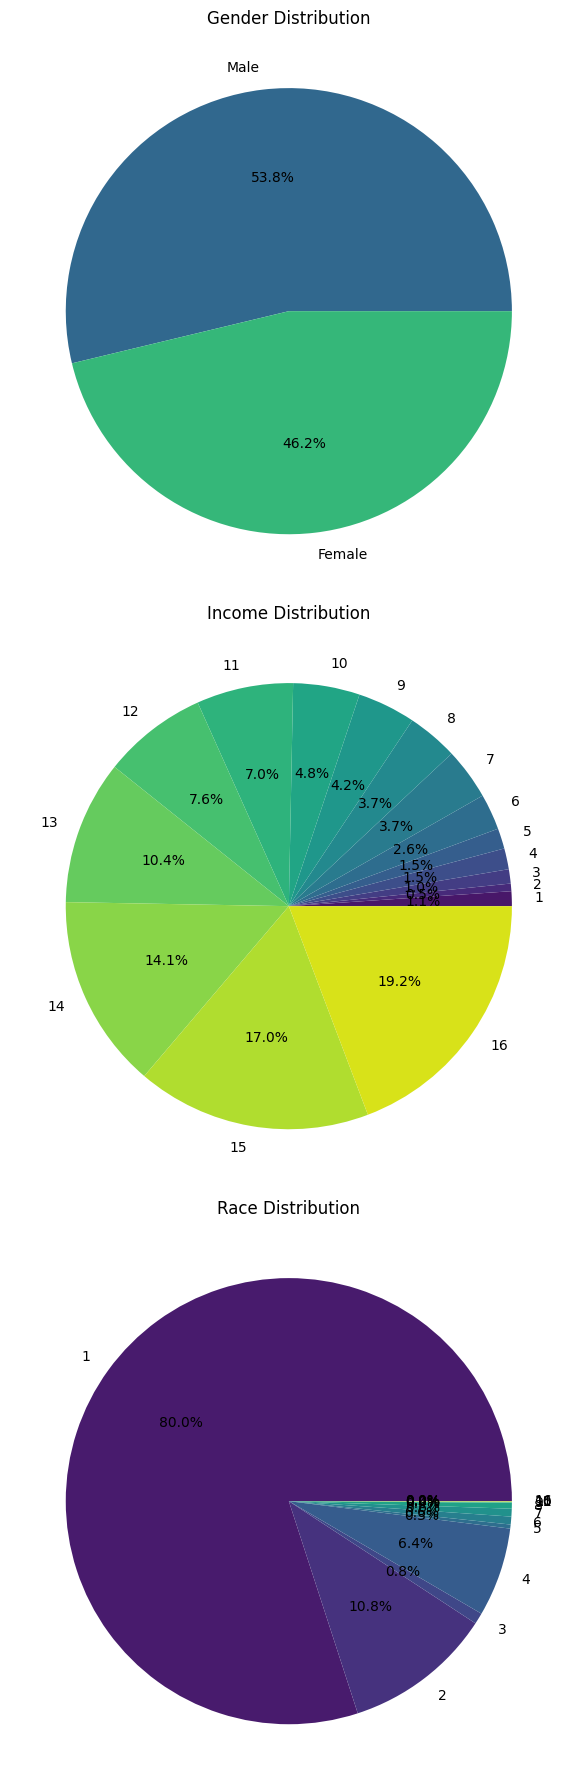

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Flag to determine annotation type: 'percentage' or 'fraction'
annotation_type = 'percentage'

# Function to generate annotation based on the flag
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        if annotation_type == 'percentage':
            return '{p:.1f}%'.format(p=pct)
        else:
            return '{v:d} / {t:d}'.format(v=val, t=total)
    return my_autopct

# Create a figure and set of subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Gender Distribution
gender_counts = atus_summary_df['TESEX'].value_counts()
gender_labels = ['Male', 'Female']

axes[0].pie(gender_counts, labels=gender_labels, autopct=make_autopct(gender_counts), colors=sns.color_palette('viridis', 2))
axes[0].set_title('Gender Distribution')

# Income Distribution
income_counts = atus_summary_df['HEFAMINC'].value_counts().sort_index()
income_labels = [str(i) for i in range(1, 17)]

axes[1].pie(income_counts, labels=income_labels, autopct=make_autopct(income_counts), colors=sns.color_palette('viridis', len(income_counts)))
axes[1].set_title('Income Distribution')

# Race Distribution
race_counts = atus_summary_df['PTDTRACE'].value_counts().sort_index()
race_labels = [label for code, label in race_dict.items() if label in race_counts.index]

axes[2].pie(race_counts, labels=race_labels, autopct=make_autopct(race_counts), colors=sns.color_palette('viridis', len(race_counts)))
axes[2].set_title('Race Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [140]:
race_dict.items()

dict_items([('White only', 1), ('Black only', 2), ('American Indian, Alaskan Native only', 3), ('Asian only', 4), ('Hawaiian/Pacific Islander only', 5), ('White-Black', 6), ('White-American Indian', 7), ('White-Asian', 8), ('White-Hawaiian', 9), ('Black-American Indian', 10), ('Black-Asian', 11), ('Black-Hawaiian', 12), ('American Indian-Asian', 13), ('American Indian-Hawaiian', 14), ('Asian-Hawaiian', 15), ('White-Black-American Indian', 16), ('White-Black-Asian', 17), ('White-Black-Hawaiian', 18), ('White-American Indian-Asian', 19), ('White-American Indian-Hawaiian', 20), ('White-Asian-Hawaiian', 21), ('Black-American Indian-Asian', 22), ('White-Black-American Indian-Asian', 23), ('White-American Indian-Asian-Hawaiian', 24), ('Other 3 race combinations', 25), ('Other 4 and 5 race combinations', 26)])

/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/2255767456.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=atus_summary_df, x='TESEX', palette='viridis', ax=axes[0])
/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/2255767456.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=atus_summary_df, x='HEFAMINC', palette='viridis', ax=axes[1])
/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/2255767456.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=atus_summary_df, x='P

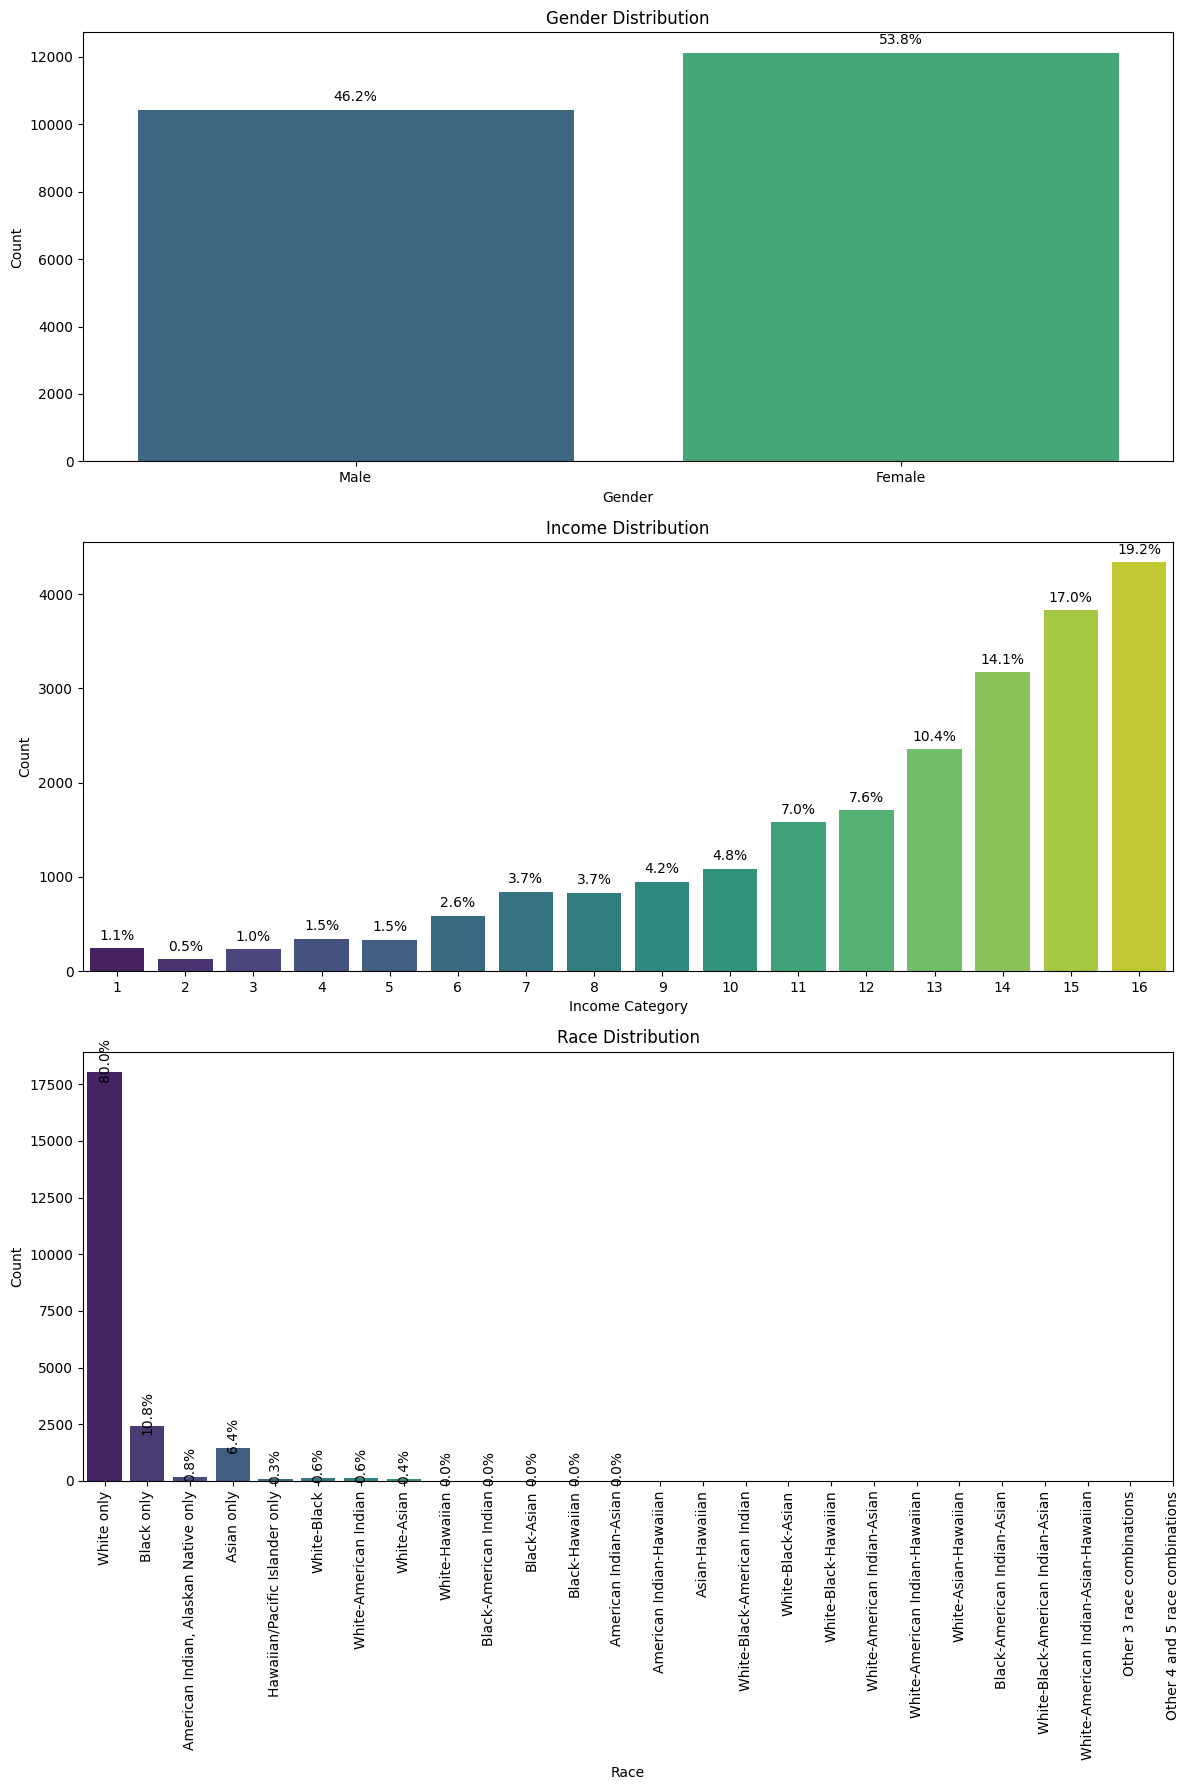

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Flag to determine annotation type: 'percentage'
annotation_type = 'percentage'

# Calculate total count for percentage calculation
total_count_gender = len(atus_summary_df)
total_count_income = len(atus_summary_df)
total_count_race = len(atus_summary_df)

# Create a figure and set of subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Gender Distribution
sns.countplot(data=atus_summary_df, x='TESEX', palette='viridis', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Male', 'Female'])

for p in axes[0].patches:
    height = p.get_height()
    if annotation_type == 'fraction':
        annotation = f'{height} of {total_count_gender}'
    elif annotation_type == 'percentage':
        annotation = f'{height / total_count_gender:.1%}'
    else:
        annotation = f'{height}'
    axes[0].annotate(annotation, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Income Distribution
sns.countplot(data=atus_summary_df, x='HEFAMINC', palette='viridis', ax=axes[1])
axes[1].set_title('Income Distribution')
axes[1].set_xlabel('Income Category')
axes[1].set_ylabel('Count')
axes[1].set_xticks(range(16))
axes[1].set_xticklabels([str(i) for i in range(1, 17)], rotation=0)

for p in axes[1].patches:
    height = p.get_height()
    if annotation_type == 'fraction':
        annotation = f'{height} of {total_count_income}'
    elif annotation_type == 'percentage':
        annotation = f'{height / total_count_income:.1%}'
    else:
        annotation = f'{height}'
    axes[1].annotate(annotation, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Race Distribution
sns.countplot(data=atus_summary_df, x='PTDTRACE', palette='viridis', ax=axes[2])
axes[2].set_title('Race Distribution')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Count')
axes[2].set_xticks(range(26))
axes[2].set_xticklabels(list(race_dict.keys()), rotation=90)

for p in axes[2].patches:
    height = p.get_height()
    if annotation_type == 'fraction':
        annotation = f'{height} of {total_count_race}'
    elif annotation_type == 'percentage':
        annotation = f'{height / total_count_race:.1%}'
    else:
        annotation = f'{height}'
    axes[2].annotate(annotation, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 9), textcoords='offset points', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/4268718413.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=atus_summary_df, x='TESEX', palette='viridis')


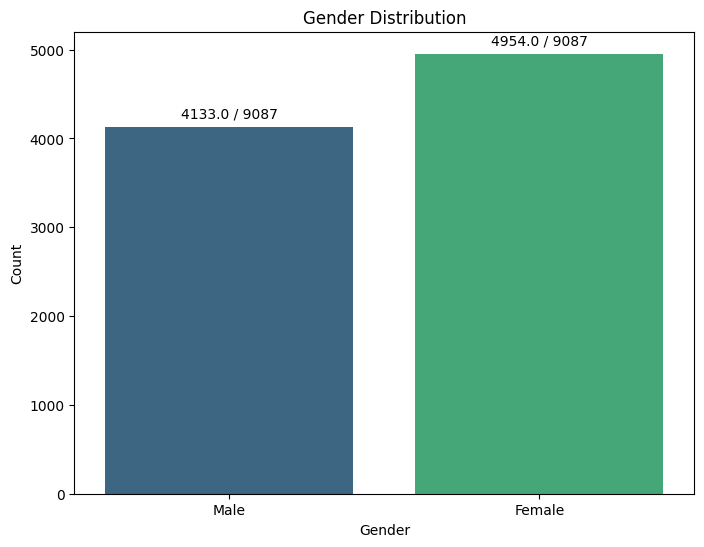

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Flag to determine annotation type: 'fraction' or 'percentage'
annotation_type = 'fraction'

plt.figure(figsize=(8, 6))
barplot = sns.countplot(data=atus_summary_df, x='TESEX', palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])

# Calculate total count for percentage calculation
total_count = len(atus_summary_df)

# Annotate each bar with the count or percentage
for p in barplot.patches:
    height = p.get_height()
    if annotation_type == 'fraction':
        annotation = f'{height} / {total_count}'
    elif annotation_type == 'percentage':
        annotation = f'{height / total_count:.1%}'
    else:
        annotation = f'{height}'
    
    barplot.annotate(annotation, 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()


In [123]:
atuscps_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atuscps-2021/atuscps_2021.csv')

# Merge atussum_df with classified_atuscps_df to get HEFAMINC value
atus_summary_df = atus_summary_df.merge(atuscps_df[['TUCASEID', 'HEFAMINC']], on='TUCASEID', how='left')

/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/2740323379.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=atus_summary_df, x='HEFAMINC', palette='viridis')


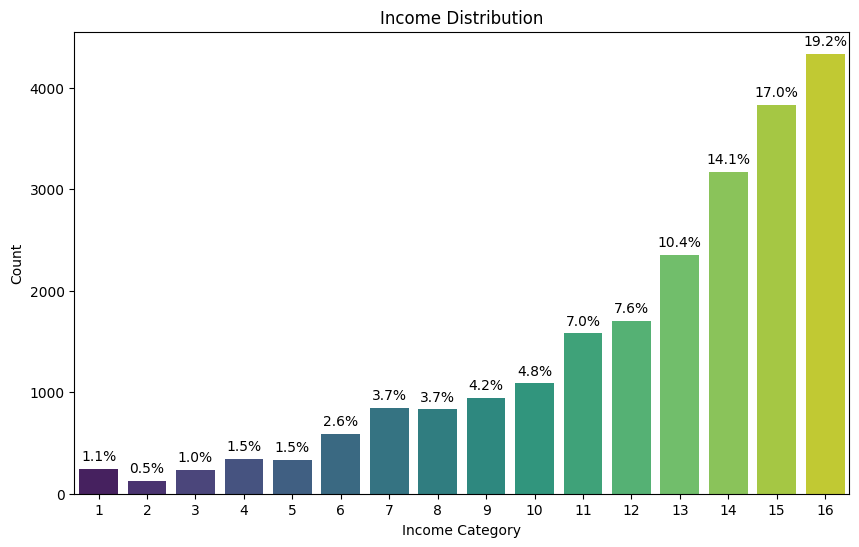

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Flag to determine annotation type: 'fraction' or 'percentage'
annotation_type = 'percentage'

plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=atus_summary_df, x='HEFAMINC', palette='viridis')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Calculate total count for percentage calculation
total_count = len(atus_summary_df)

# Annotate each bar with the count or percentage
for p in barplot.patches:
    height = p.get_height()
    if annotation_type == 'fraction':
        annotation = f'{height} of {total_count}'
    elif annotation_type == 'percentage':
        annotation = f'{height / total_count:.1%}'
    else:
        annotation = f'{height}'
    
    barplot.annotate(annotation, 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()


/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_1965/1507466981.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=atus_summary_df, x='PTDTRACE', palette='viridis')


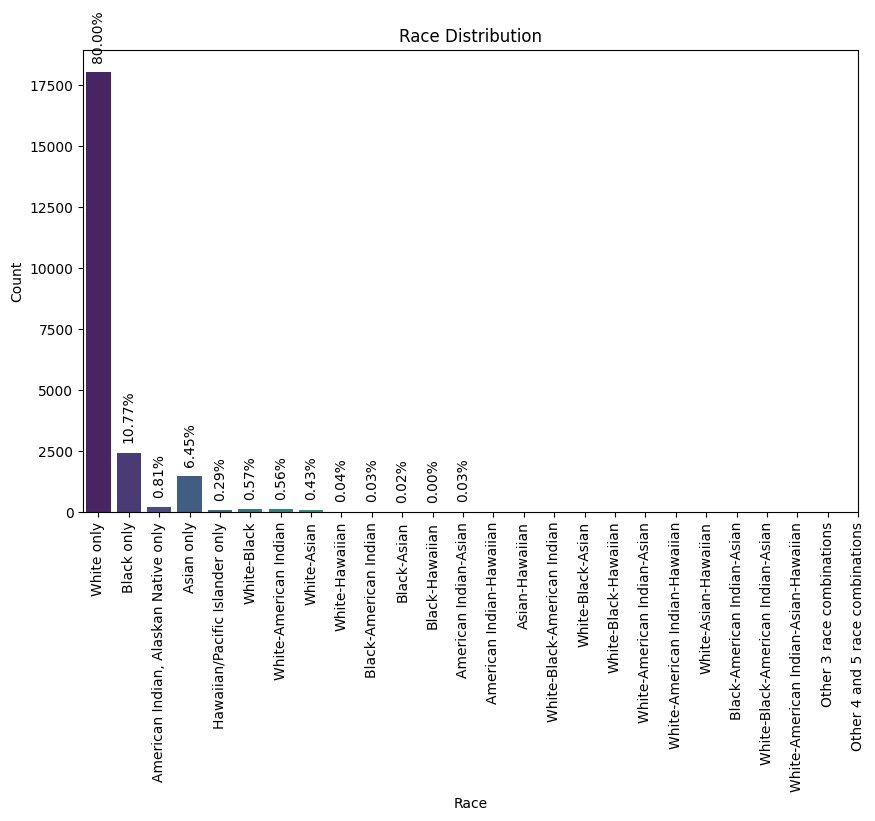

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Flag to determine annotation type: 'fraction' or 'percentage'
annotation_type = 'percentage'

plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=atus_summary_df, x='PTDTRACE', palette='viridis')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(ticks=range(0, 26), labels=list(race_dict.keys()), rotation=90)

# Calculate total count for percentage calculation
total_count = len(atus_summary_df)

# Annotate each bar with the count or percentage
for p in barplot.patches:
    height = p.get_height()
    if annotation_type == 'fraction':
        annotation = f'{height} of {total_count}'
    elif annotation_type == 'percentage':
        annotation = f'{height / total_count:.2%}'
    else:
        annotation = f'{height}'
    
    barplot.annotate(annotation, 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     rotation=90)

plt.show()
